In [13]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, MaxPooling2D, Conv2D, Dense, Flatten, concatenate
from tensorflow.python.keras.models import load_model

In [14]:
trainData = np.load('augmented_image_data.npy')
inputSample = trainData[65*54]

In [18]:
TARGET_LAYER = 'CH_2_CONV_2'

model = load_model(filepath = join('../data_out/model', 'model.h5'), compile = False)
# print(model.summary())

input_layer = model.inputs[0]
output_layer = model.get_layer(TARGET_LAYER).output

new_model = Model(inputs=input_layer, outputs=output_layer)
print(new_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 64, 64, 1)         0         
_________________________________________________________________
CH_1_CONV_1 (Conv2D)         (None, 64, 64, 16)        160       
_________________________________________________________________
CH_2_CONV_2 (Conv2D)         (None, 64, 64, 16)        2320      
Total params: 2,480
Trainable params: 0
Non-trainable params: 2,480
_________________________________________________________________
None


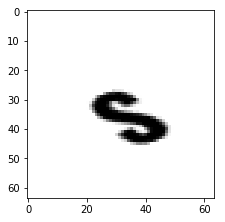

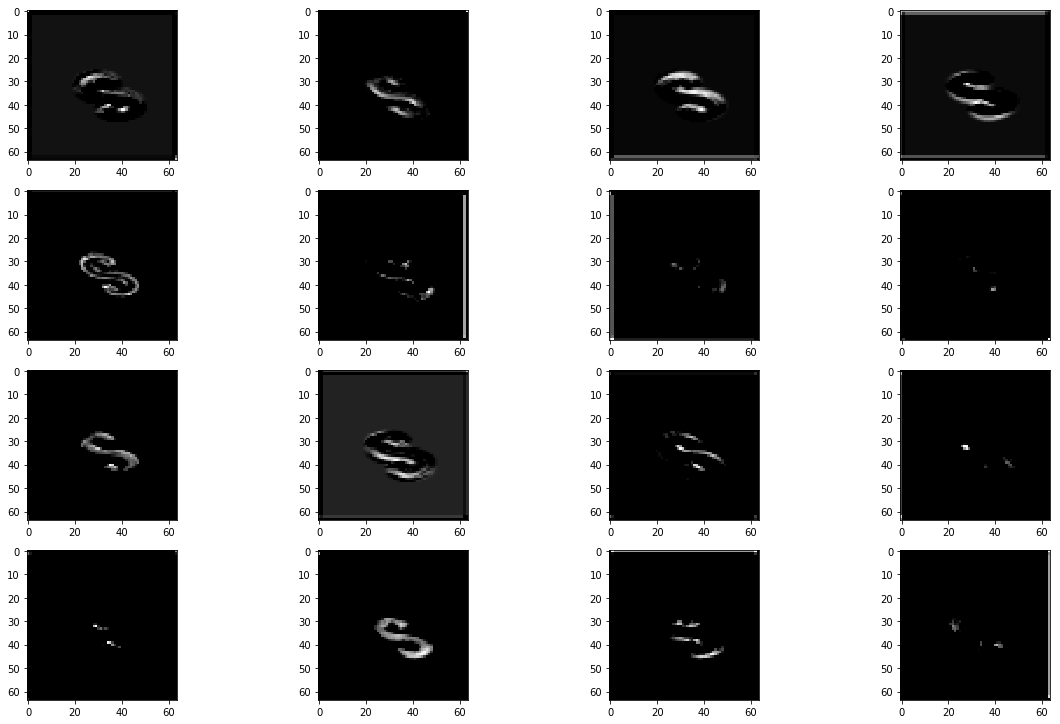

In [19]:
plt.figure(figsize=(20, 20))

# DISPLAY SAMPLE INPUT IMAGE
plt.subplot(5, 4, 1)
plt.imshow(inputSample.reshape((64,64)), cmap='gray')

outputs = new_model.predict(np.array([inputSample]))[0]
no_of_outputs = outputs.shape[2]

plt.figure(figsize=(20, no_of_outputs/4*4))

for i in range(no_of_outputs):
    plt.subplot(no_of_outputs//4 + 1, 4, i+1)
    plt.imshow(outputs[:, :, i], cmap='gray')
    